In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('water.csv')

In [3]:
data

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


1 Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

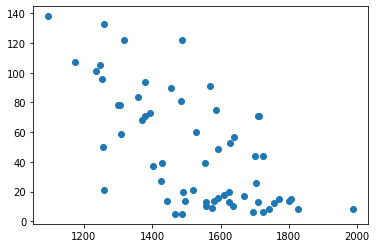

In [4]:
#Построить точечный график
plt.scatter(data['mortality'], data['hardness'])

In [5]:
#Рассчитать коэффициенты корреляции Пирсона и Спирмена
data[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [7]:
data[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


Cудя по коэффициенту корреляции между уровнем жесткости воды и смертностью существует небольшая обратная зависимость

In [21]:
#Построить модель линейной регрессии
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [66]:
X = data[['mortality']].values
Y = data['hardness'].values

In [67]:
X = sm.add_constant(X)

In [68]:
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     44.30
Date:                Thu, 24 Sep 2020   Prob (F-statistic):           1.03e-08
Time:                        19:41:37   Log-Likelihood:                -291.01
No. Observations:                  61   AIC:                             586.0
Df Residuals:                      59   BIC:                             590.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        249.7769     30.666      8.145      0.0

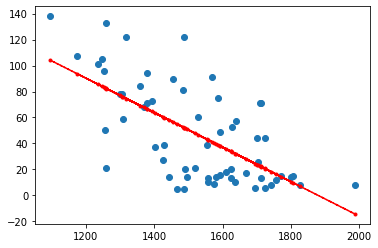

In [35]:
fig, ax = plt.subplots()

ax.plot(X[:,1], Y, 'o')
ax.plot(X[:,1], results.fittedvalues, 'r--.')

In [25]:
#Рассчитать коэффициент детерминации
print('R2: ', results.rsquared)

R2:  0.42882671931249716


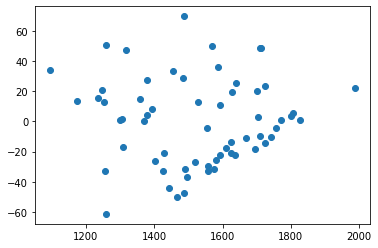

In [26]:
plt.scatter(X[:, 1], results.resid)

Коэффициент детерминациии маленький, но остатки распределены хаотично - построенная модель описывает зависимость данных, но долека от идеальной

2 Задание.
Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

In [38]:
data_south  = data.loc[data.location == 'South']

In [40]:
data_north  = data.loc[data.location == 'North']

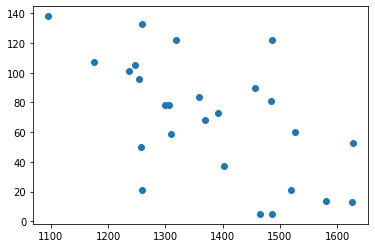

In [41]:
plt.scatter(data_south['mortality'], data_south['hardness'])

In [42]:
data_south  [['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [43]:
data_south[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


Для городов расположенных на Юге обратная зависимость сохраняется, но становится чуть-чуть слабей

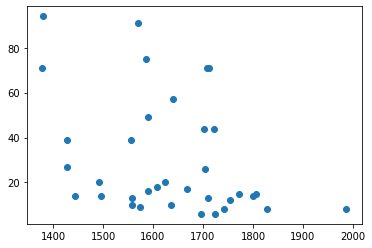

In [44]:
plt.scatter(data_north['mortality'], data_north['hardness'])

In [45]:
data_north[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [46]:
data_north[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


Для городов расположенных на Севере корреляция между уровнем жесткости воды и смертностью сильно ниже, но остается обратной

In [47]:
from sklearn.linear_model import LinearRegression

In [56]:
X_s = data_south[['mortality']].values
Y_s = data_south['hardness'].values

In [57]:
model = LinearRegression()
model.fit(X_s, Y_s)
model.score(X_s, Y_s)

0.3625885624364601

In [69]:
X_n = data_north[['mortality']].values
Y_n = data_north['hardness'].values

In [74]:
model = LinearRegression()
model.fit(X_n, Y_n)
model.score(X_n, Y_n)

0.13586436642071698

Коэффициент детерминации при рассматривании городов по-отдельности значительно меньше, особенно у городов на Севере, что говорит о том, что линейная регрессия плохо описываает зависимостиэтих данных